In [2]:
# Import Dependencies
from cointegration_analysis import estimate_long_run_short_run_relationships, engle_granger_two_step_cointegration_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'cointegration_analysis'

In [3]:
def read_data(filename):
    ''''This function reads the .csv stored at the 'filename' location and returns a DataFrame
    with two levels of column names. The first level column contains the Stock Name and the 
    second contains the type of market data, e.g. bid/ask, price/volume.
    '''
    df  = pd.read_csv(filename,index_col = 0)
    df.columns = [df.columns.str[-2:], df.columns.str[:-3]] # to move the stock up and down the column
    
    return df

market_data = read_data('pairs Trading.csv')

# Show the First 5 Rows
display(market_data.head())

# Show the Stocks
stock_names = list(market_data.columns.get_level_values(0).unique())
print('The stocks available are',stock_names)
    

NameError: name 'pd' is not defined

In [4]:
market_data_segmented  = market_data[:250]

def bid_ask_price_plot(stock1,stock2):
    '''
    This function creates a subplot with a specified gridsize to be able to
    effectively match it with a different subplot while still maintaining
    it's independency of being able to just show this plot.
    '''
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
    plt.title('Bid & Ask Prices Development of the Stocks ' + stock1 + " and " + stock2)
    plt.grid()
    
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'BidPrice'])
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'AskPrice'])
    
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'BidPrice'])
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'AskPrice'])
    
     # We don't want to see all the timestamps
    ax1.axes.get_xaxis().set_visible(False)

    ax1.legend([stock1 + " Bid Price", stock1 + " Ask Price", stock2 + " Bid Price", stock2 + " Ask Price"], loc='upper right')
    

    
def bid_ask_volume_plot(stock1,stock2):
    '''
    This function is very similar to above's function with the exception
    of creating a smaller subplot and using different data. This function
    is meant for displaying volumes. '''
    
    ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1)
    plt.title('Bid & Ask Volumes Development of the Stocks ' + stock1 + " and " + stock2)
    plt.grid()

    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'BidVolume'])
    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'AskVolume'])

    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'BidVolume'])
    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'AskVolume'])

    # We don't want to see all the timestamps
    ax2.axes.get_xaxis().set_visible(False)

    ax2.legend([stock1 + " Bid Volume", stock1 + " Ask Volume", stock2 + " Bid Volume", stock2 + " Ask Volume"], loc='upper right')

# Show Plot
plt.figure(figsize=(15, 15))
plt.show(bid_ask_price_plot("CC", "MM"), bid_ask_volume_plot("CC", "MM"))

NameError: name 'market_data' is not defined

In [24]:
#Calculate mid-prices of each stock and add them to the DataFrame

for stock in stock_names:
    market_data[stock,'MidPrice'] = (market_data[stock,'BidPrice'] + market_data[stock,'AskPrice']) / 2
    market_data = market_data.sort_index(axis=1) # 1 = column and 0 = rows to sort
    
market_data

AA                                             BB  \
                 AskPrice AskVolume BidPrice BidVolume MidPrice AskPrice   
01/01/2018 00:05    80.25       135    80.00       135   80.125   100.85   
01/01/2018 00:10    80.20       145    79.95       124   80.075   100.80   
01/01/2018 00:15    80.15       155    79.95       124   80.050   100.95   
01/01/2018 00:20    80.10       154    79.95       130   80.025   101.05   
01/01/2018 00:25    80.10       138    79.90       121   80.000   100.85   
...                   ...       ...      ...       ...      ...      ...   
28/02/2018 23:35    93.15       201    92.85       180   93.000    96.00   
28/02/2018 23:40    93.15       180    92.85       163   93.000    96.00   
28/02/2018 23:45    93.05       192    92.80       169   92.925    96.00   
28/02/2018 23:50    93.00       173    92.70       143   92.850    96.05   
28/02/2018 23:55    93.10       156    92.80       147   92.950    96.00   

                                                        ...       NN  \
                 AskVolume BidPrice BidVolume MidPrice  ... AskPrice   
01/01/2018 00:05       105   100.55       105  100.700  ...   137.60   
01/01/2018 00:10       113   100.50       104  100.650  ...   137.55   
01/01/2018 00:15       107   100.65       100  100.800  ...   137.65   
01/01/2018 00:20       109   100.75       112  100.900  ...   137.65   
01/01/2018 00:25       124   100.60       126  100.725  ...   137.60   
...                    ...      ...       ...      ...  ...      ...   
28/02/2018 23:35       123    95.75       139   95.875  ...   132.60   
28/02/2018 23:40       122    95.75       155   95.875  ...   132.60   
28/02/2018 23:45       113    95.75       128   95.875  ...   132.60   
28/02/2018 23:50       100    95.80       119   95.925  ...   132.45   
28/02/2018 23:55       105    95.75       113   95.875  ...   132.50   

                                                             OO            \
                 AskVolume BidPrice BidVolume MidPrice AskPrice AskVolume   
01/01/2018 00:05       122   137.20       122  137.400    89.05       109   
01/01/2018 00:10       110   137.20       111  137.375    89.00       100   
01/01/2018 00:15       106   137.25       117  137.450    89.00       100   
01/01/2018 00:20        97   137.25       107  137.450    89.00       113   
01/01/2018 00:25       109   137.15       111  137.375    89.00       112   
...                    ...      ...       ...      ...      ...       ...   
28/02/2018 23:35       145   132.20       174  132.400    94.05        94   
28/02/2018 23:40       142   132.25       188  132.425    94.10       103   
28/02/2018 23:45       147   132.25       174  132.425    94.05       102   
28/02/2018 23:50       149   132.10       153  132.275    94.10       110   
28/02/2018 23:55       126   132.15       153  132.325    94.15       114   

                                              
                 BidPrice BidVolume MidPrice  
01/01/2018 00:05    88.80       109   88.925  
01/01/2018 00:10    88.75       115   88.875  
01/01/2018 00:15    88.70        92   88.850  
01/01/2018 00:20    88.75       100   88.875  
01/01/2018 00:25    88.75        98   88.875  
...                   ...       ...      ...  
28/02/2018 23:35    93.80       123   93.925  
28/02/2018 23:40    93.85       135   93.975  
28/02/2018 23:45    93.80       126   93.925  
28/02/2018 23:50    93.80       115   93.950  
28/02/2018 23:55    93.85       110   94.000  

[16991 rows x 75 columns]

In [1]:
def mid_price_check(stock):
    '''
    Function that checks for different stocks if the MidPrice
    is correctly specified.
    '''
    plt.figure(figsize=(20, 5))
    plt.plot(market_data[stock,'AskPrice'][:100])
    plt.plot(market_data[stock,'MidPrice'][:100])
    plt.plot(market_data[stock,'BidPrice'][:100])

    plt.xticks([]) # Timestamp is not Important
    plt.title('Ask, Bid and Mid Price Development of Stock ' + stock)
    plt.legend(["Ask Price", "Mid Price", "Bid Price"], loc='lower left')
    plt.show()
    
mid_price_check('MM')

NameError: name 'plt' is not defined

In [26]:
# Obtain the statistical parameters for each and every pair
data_analysis = {'Pairs': [],
                 'Constant': [],
                 'Gamma': [],
                 'Alpha': [],
                 'P-Value': []}

data_zvalues = {}

for stock1 in stock_names:
    for stock2 in stock_names:
        if stock1 != stock2:
            if (stock2, stock1) in data_analysis['Pairs']:
                continue

            pairs = stock1, stock2
            constant = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[0]
            gamma = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[1]
            alpha = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[2]
            pvalue = engle_granger_two_step_cointegration_test(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[1]
            zvalue = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[3]

            data_analysis['Pairs'].append(pairs)
            data_analysis['Constant'].append(constant)
            data_analysis['Gamma'].append(gamma)
            data_analysis['Alpha'].append(alpha)
            data_analysis['P-Value'].append(pvalue)

            data_zvalues[pairs] = zvalue
            
data_analysis = round(pd.DataFrame(data_analysis),4).set_index('Pairs')

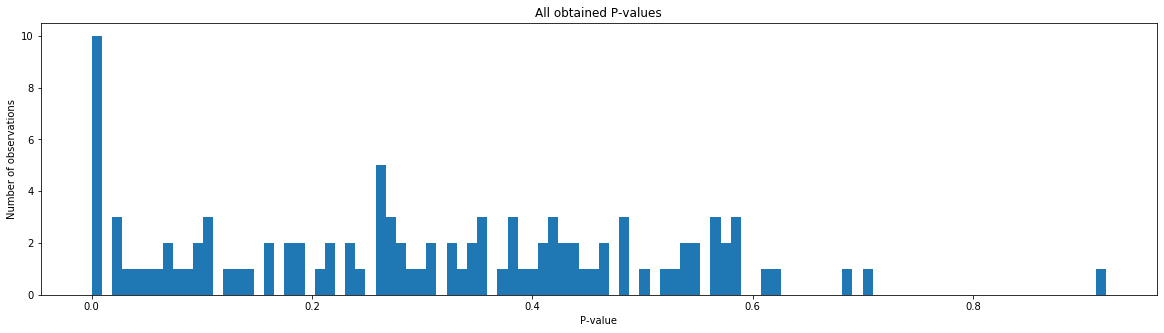

In [27]:
# Visualize the P-values
def plot_pvalues():
    """
    This function plots all obtained P-values.
    """
    plt.figure(figsize=(20, 5))
    plt.hist(data_analysis['P-Value'], bins=100)
    plt.xlabel('P-value')
    plt.ylabel('Number of observations')
    plt.title('All obtained P-values')
    plt.show()

plot_pvalues()

In [28]:
# Show Top 10 and Bottom 10
display(data_analysis.sort_values('P-Value')[:10])
display(data_analysis.sort_values('P-Value')[-10:])

,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(FF, NN)",-2.6104,1.4881,-0.0022,0.0000
"(FF, MM)",0.3061,0.9676,-0.0338,0.0000
"(BB, DD)",-2.4182,1.4758,-0.0075,0.0000
"(DD, HH)",-1.6797,1.2787,-0.0040,0.0000
"(BB, JJ)",-2.4809,1.6206,-0.0000,0.0000
"(DD, JJ)",0.2277,1.0356,0.0002,0.0000
"(MM, NN)",-2.9034,1.5153,-0.0002,0.0000
"(BB, HH)",-4.8181,1.8712,-0.0024,0.0009
"(HH, JJ)",1.9492,0.7041,-0.0002,0.0010


,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(AA, BB)",4.2082,0.0571,-0.0001,0.5739
"(EE, JJ)",5.0700,-0.0369,-0.0002,0.5765
"(AA, MM)",10.2964,-1.2938,-0.0001,0.5812
"(AA, KK)",9.7238,-1.1233,-0.0001,0.5826
"(AA, JJ)",4.1324,0.0773,-0.0001,0.5860
"(AA, DD)",4.2125,0.0540,-0.0001,0.6103
"(CC, EE)",1.7955,0.5551,-0.0002,0.6199
"(CC, OO)",8.4182,-0.8627,-0.0002,0.6888
"(CC, GG)",2.8739,0.3184,-0.0002,0.7055


In [29]:
# Selecting tradable pairs where P-Value < 0.01 and create a seperate DataFrame containing these pairs
tradable_pairs_analysis = data_analysis[data_analysis['P-Value'] < 0.01].sort_values('P-Value')

tradable_pairs_analysis

,Constant,Gamma,Alpha,P-Value
Pairs,,,,
"(BB, DD)",-2.4182,1.4758,-0.0075,0.0000
"(BB, JJ)",-2.4809,1.6206,-0.0000,0.0000
"(DD, HH)",-1.6797,1.2787,-0.0040,0.0000
"(DD, JJ)",0.2277,1.0356,0.0002,0.0000
"(FF, MM)",0.3061,0.9676,-0.0338,0.0000
"(FF, NN)",-2.6104,1.4881,-0.0022,0.0000
"(MM, NN)",-2.9034,1.5153,-0.0002,0.0000
"(BB, HH)",-4.8181,1.8712,-0.0024,0.0009
"(HH, JJ)",1.9492,0.7041,-0.0002,0.0010


In [30]:
# Get all the tradable stock pairs into a list
stock_pairs = list(tradable_pairs_analysis.index.values.tolist())

# Show the Pairs
stock_pairs

[('BB', 'DD'),
 ('BB', 'JJ'),
 ('DD', 'HH'),
 ('DD', 'JJ'),
 ('FF', 'MM'),
 ('FF', 'NN'),
 ('MM', 'NN'),
 ('BB', 'HH'),
 ('HH', 'JJ'),
 ('AA', 'II')]

Algorithm

Within this section we build further on the Data Analysis section by zooming in onto the pairs and calculate additional data on the error correction terms.

In [31]:
# Create a list of unique tradable stocks
list_stock1 = [stock[0] for stock in stock_pairs]
list_stock2 = [stock[1] for stock in stock_pairs]

for stock in list_stock2:
    list_stock1.append(stock)
    
unique_stock_list = list(set(list_stock1))

# Create a new DataFrame containing all market information for the tradable pairs
tradable_pairs_data = market_data[unique_stock_list]
tradable_pairs_data.head()

II                                             DD  \
                 AskPrice AskVolume BidPrice BidVolume MidPrice AskPrice   
01/01/2018 00:05    83.80       124    83.55       124   83.675   117.30   
01/01/2018 00:10    83.65       134    83.40       156   83.525   117.25   
01/01/2018 00:15    83.65       129    83.40       132   83.525   117.20   
01/01/2018 00:20    83.80       129    83.55       140   83.675   117.30   
01/01/2018 00:25    83.85       116    83.55       136   83.700   117.30   

                                                        ...       FF  \
                 AskVolume BidPrice BidVolume MidPrice  ... AskPrice   
01/01/2018 00:05       102   116.95       102  117.125  ...   111.75   
01/01/2018 00:10       103   116.95        98  117.100  ...   111.80   
01/01/2018 00:15       113   116.90       109  117.050  ...   111.90   
01/01/2018 00:20       117   116.95       100  117.125  ...   111.95   
01/01/2018 00:25       129   116.95       106  117.125  ...   111.95   

                                                             BB            \
                 AskVolume BidPrice BidVolume MidPrice AskPrice AskVolume   
01/01/2018 00:05       118   111.45       118  111.600   100.85       105   
01/01/2018 00:10       109   111.50       115  111.650   100.80       113   
01/01/2018 00:15        97   111.55       101  111.725   100.95       107   
01/01/2018 00:20        98   111.60       102  111.775   101.05       109   
01/01/2018 00:25        97   111.60       102  111.775   100.85       124   

                                              
                 BidPrice BidVolume MidPrice  
01/01/2018 00:05   100.55       105  100.700  
01/01/2018 00:10   100.50       104  100.650  
01/01/2018 00:15   100.65       100  100.800  
01/01/2018 00:20   100.75       112  100.900  
01/01/2018 00:25   100.60       126  100.725  

[5 rows x 45 columns]

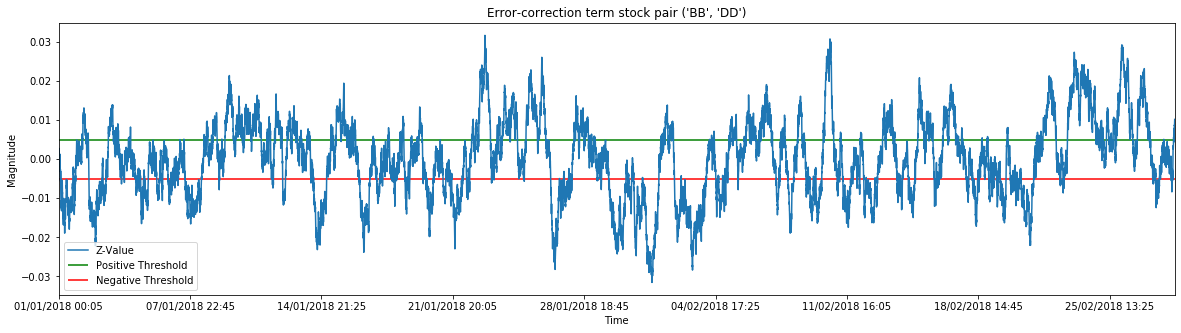

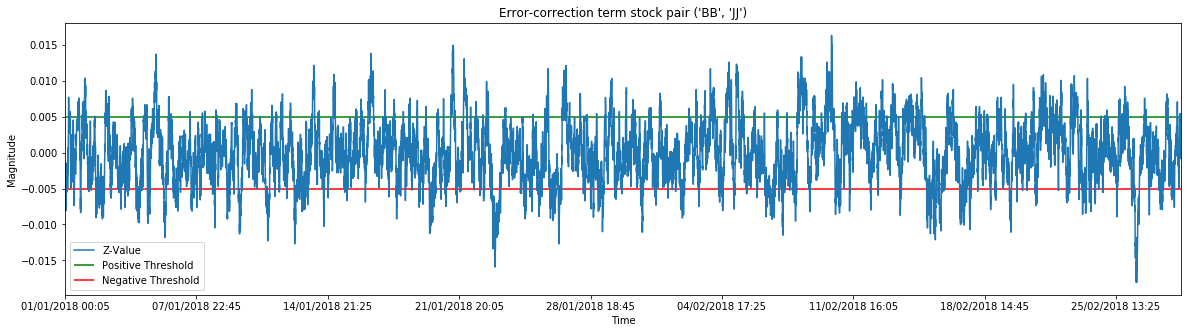

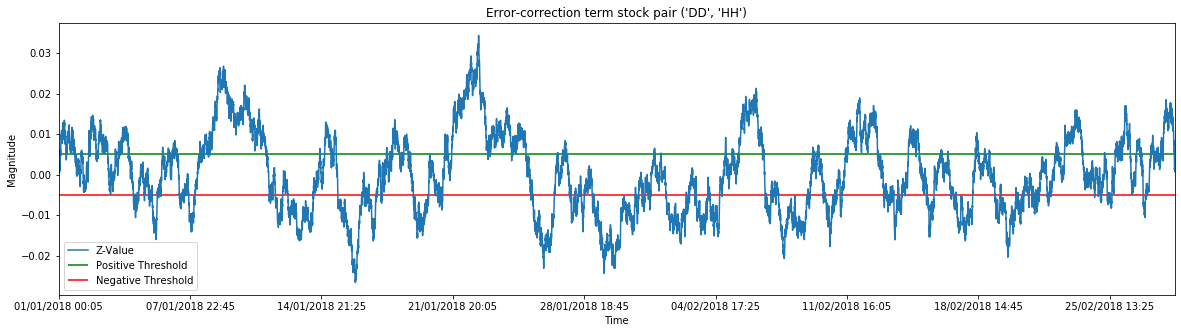

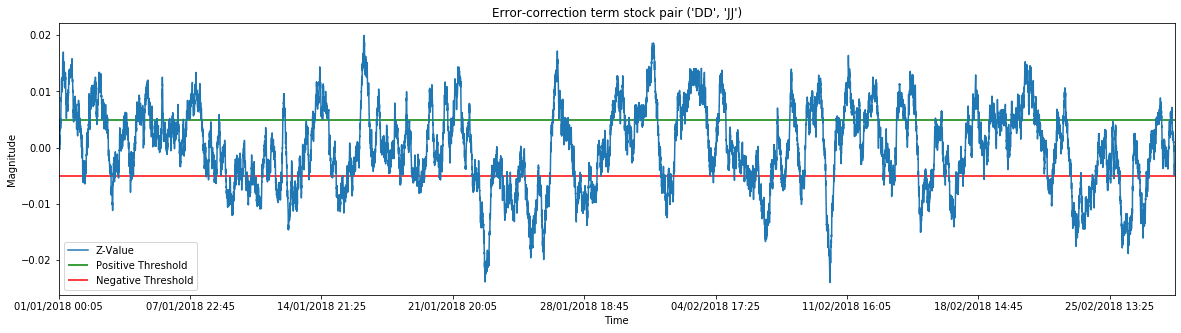

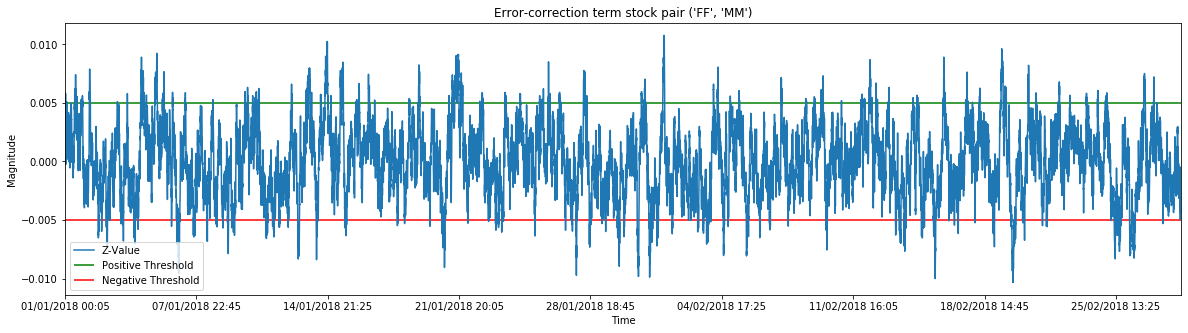

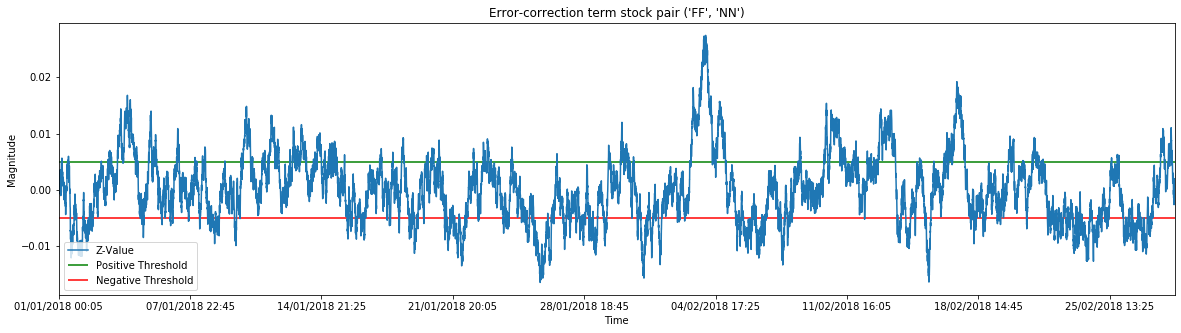

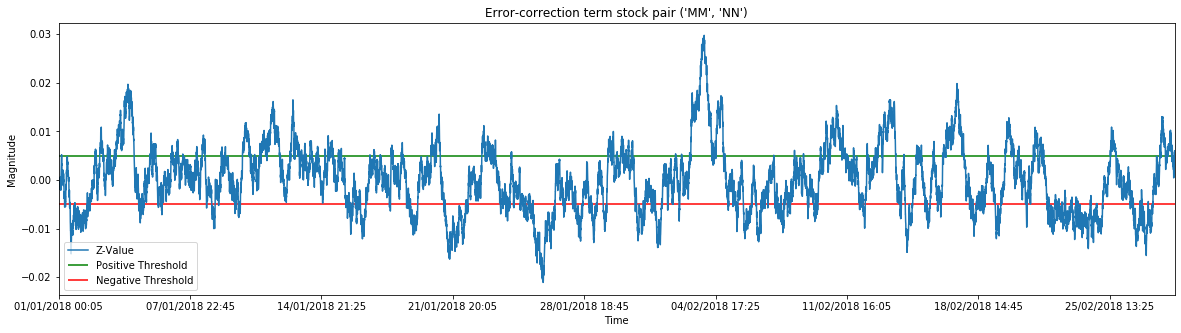

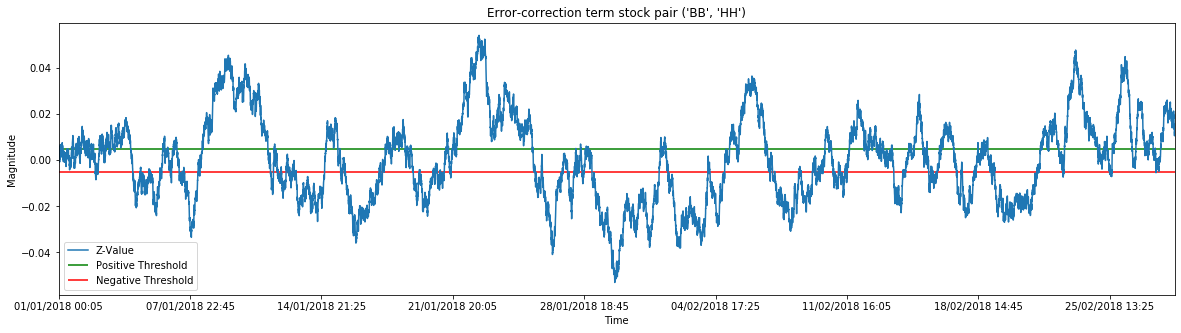

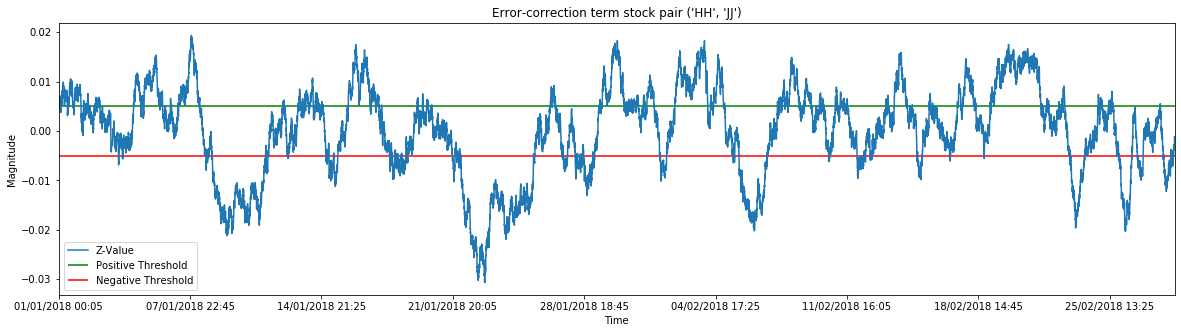

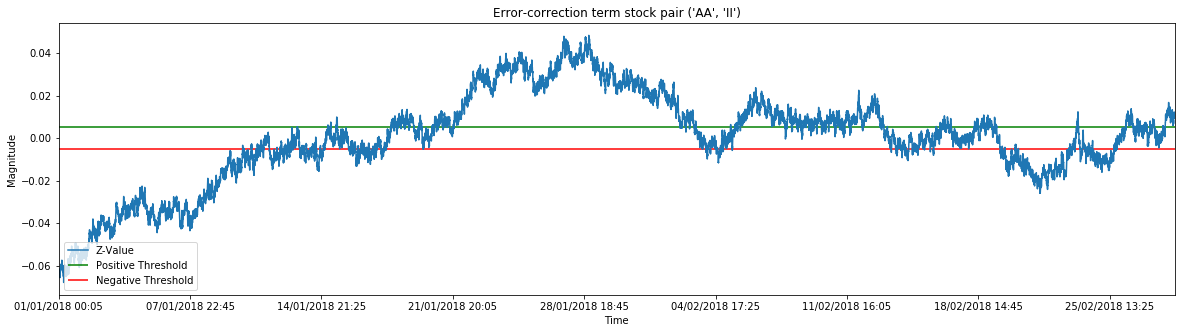

In [32]:
def Plot_Tradable_Z():
    """
    This function plots the z-values of all pairs based on
    the data_zvalues dataframe.
    """
    for pair in stock_pairs: 
        zvalue = data_zvalues[pair]
        plt.figure(figsize=(20,5))
        plt.title('Error-correction term stock pair {}'.format(pair))
        zvalue.plot()
        plt.xlabel('Time')
        plt.ylabel('Magnitude')

        xmin = 0
        xmax = len(zvalue)
        plt.hlines(0.005, xmin, xmax, 'g') # Note 0.005 is randomly chosen
        plt.hlines(-0.005, xmin, xmax, 'r') # Note -0.005 is randomly chosen
        
        plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'], loc='lower left')
        
        plt.show()
        
Plot_Tradable_Z()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


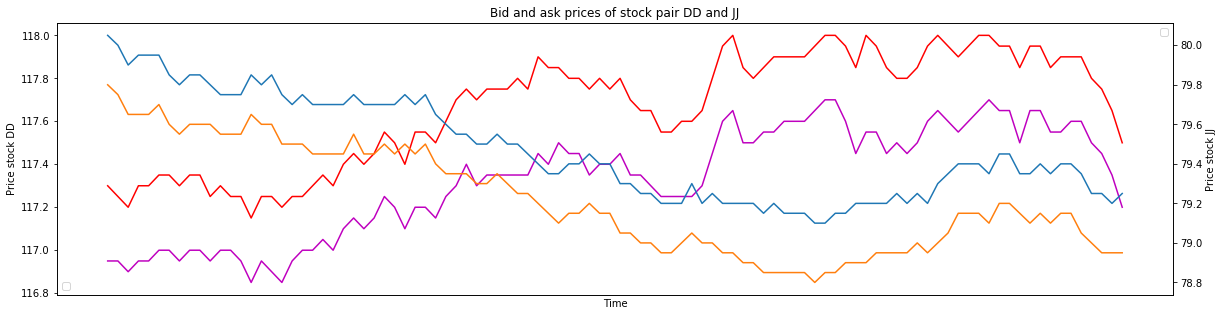

In [33]:
# Select randomly chosen pair from the tradable stock and visualize bid and ask prices, bid and ask volumes, and the z-values
import random

# Choose random stock
random_pair = random.choice(stock_pairs)

# Create a plot showing the bid and ask prices of a randomly chosen stock
def Plot_RandomPair_BidAskPrices():
    """
    This function plots the bid and ask price of a randomly chosen tradable pair.
    """
    plt.figure(figsize=(20,5))
    plt.title('Bid and ask prices of stock pair {} and {}'.format(random_pair[0], random_pair[1]))
    
    plt.plot(tradable_pairs_data[random_pair[0], 'AskPrice'].iloc[:100], 'r')
    plt.plot(tradable_pairs_data[random_pair[0], 'BidPrice'].iloc[:100], 'm')
    plt.xlabel('Time')
    plt.ylabel('Price stock {}'.format(random_pair[0]))
    plt.legend(loc='lower left')
    
    plt.twinx()
    plt.plot(tradable_pairs_data[random_pair[1], 'AskPrice'].iloc[:100])
    plt.plot(tradable_pairs_data[random_pair[1], 'BidPrice'].iloc[:100])
    plt.xticks([])
    plt.ylabel('Price stock {}'.format(random_pair[1]))
    plt.legend(loc='upper right')
    
    plt.show()

Plot_RandomPair_BidAskPrices()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


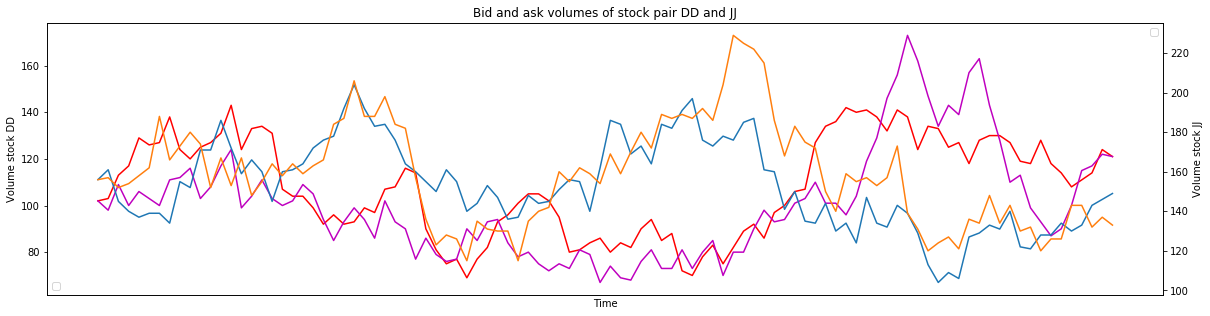

In [34]:
# Create a plot showing the bid and ask volumes of a randomly chosen stock
def Plot_RandomPair_BidAskVolumes(): # Plot not really clarifying, maybe other kind of plot?
    """
    This function plots the bid and ask volumes of a randomly chosen tradable pair.
    """
    plt.figure(figsize=(20,5))
    plt.title('Bid and ask volumes of stock pair {} and {}'.format(random_pair[0],random_pair[1]))
    
    plt.plot(tradable_pairs_data[random_pair[0], 'AskVolume'].iloc[:100], 'r')
    plt.plot(tradable_pairs_data[random_pair[0], 'BidVolume'].iloc[:100], 'm')
    plt.xlabel('Time')
    plt.ylabel('Volume stock {}'.format(random_pair[0]))
    plt.legend(loc='lower left')
    
    plt.twinx()
    plt.plot(tradable_pairs_data[random_pair[1], 'AskVolume'].iloc[:100])
    plt.plot(tradable_pairs_data[random_pair[1], 'BidVolume'].iloc[:100])
    plt.xticks([])
    plt.ylabel('Volume stock {}'.format(random_pair[1]))
    plt.legend(loc='upper right')
    
    plt.show()

Plot_RandomPair_BidAskVolumes()

In [35]:
# Create a Dataframe containing information about the error-correction term of each pair
data_error_correction_term = {'Pair': [],
                              'CountZeroCrossings': [],
                              'TradingPeriod': [],
                              'LongRunMean': [],
                              'Std': []}

for pair in stock_pairs:
    zvalue = data_zvalues[pair]
    my_array = np.array(zvalue)
    count = ((my_array[:-1] * my_array[1:]) < 0).sum()
    trading_period = 1 / count
    long_run_mean = zvalue.mean()
    std = zvalue.std()

    data_error_correction_term['Pair'].append(pair)
    data_error_correction_term['CountZeroCrossings'].append(count)
    data_error_correction_term['TradingPeriod'].append(trading_period)
    data_error_correction_term['LongRunMean'].append(round(long_run_mean, 4))
    data_error_correction_term['Std'].append(round(std, 4))

data_error_correction_term = pd.DataFrame(data_error_correction_term).set_index('Pair')

data_error_correction_term

,CountZeroCrossings,TradingPeriod,LongRunMean,Std
Pair,,,,
"(BB, DD)",660,0.001515,-0.0,0.0100
"(BB, JJ)",1475,0.000678,-0.0,0.0044
"(DD, HH)",396,0.002525,-0.0,0.0097
"(DD, JJ)",592,0.001689,-0.0,0.0072
"(FF, MM)",1413,0.000708,-0.0,0.0031
"(FF, NN)",705,0.001418,0.0,0.0061
"(MM, NN)",627,0.001595,-0.0,0.0068
"(BB, HH)",334,0.002994,0.0,0.0181
"(HH, JJ)",363,0.002755,0.0,0.0090


In [36]:
# Create a new column within the earlier defined DataFrame with Z-Values of all stock pairs
for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    tradable_pairs_data[stock1+stock2, 'Z-Value'] = data_zvalues[stock1,stock2]

C:\Users\Fidelis Achu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Create a Dictionary that saves all Gamma values of each pair
gamma_dictionary = {}

for pair, value in tradable_pairs_analysis.iterrows():
    gamma_dictionary[pair]= value['Gamma']
    
gamma_dictionary

{('BB', 'DD'): 1.4758,
 ('BB', 'JJ'): 1.6206,
 ('DD', 'HH'): 1.2787,
 ('DD', 'JJ'): 1.0356,
 ('FF', 'MM'): 0.9676,
 ('FF', 'NN'): 1.4881,
 ('MM', 'NN'): 1.5153,
 ('BB', 'HH'): 1.8712,
 ('HH', 'JJ'): 0.7041,
 ('AA', 'II'): 0.9944}

In [38]:
# Create a Dictionary that saves all Standard Deviation values of each pair
std_dictionary = {}

for pair, value in data_error_correction_term.iterrows():
    std_dictionary[pair]= value['Std']
    
std_dictionary

{('BB', 'DD'): 0.01,
 ('BB', 'JJ'): 0.0044,
 ('DD', 'HH'): 0.0097,
 ('DD', 'JJ'): 0.0072,
 ('FF', 'MM'): 0.0031,
 ('FF', 'NN'): 0.0061,
 ('MM', 'NN'): 0.0068,
 ('BB', 'HH'): 0.0181,
 ('HH', 'JJ'): 0.009,
 ('AA', 'II'): 0.0214}

In [61]:
positions = {}
limit = 100

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    gamma = gamma_dictionary[stock1,stock2]
    
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        
        current_position_stock1 = 0 
        current_position_stock2 = 0 
        
        column_name_stock1 = stock1 + ' Pos - Thres: ' + str(threshold)
        
        BidPrice_Stock1 = tradable_pairs_data[stock1,'BidVolume'][0]
        AskPrice_Stock1 = tradable_pairs_data[stock1,'AskVolume'][0]
        BidPrice_Stock2 = tradable_pairs_data[stock2,'BidVolume'][0]
        AskPrice_Stock2 = tradable_pairs_data[stock1,'AskVolume'][0]
        
        positions[column_name_stock1] = []
        
        for time, data_at_time in tradable_pairs_data.iterrows():
            
            BidVolume_Stock1 = data_at_time[stock1, 'BidVolume']
            AskVolume_Stock1 = data_at_time[stock1, 'AskVolume']
            BidVolume_Stock2 = data_at_time[stock2, 'BidVolume']
            AskVolume_Stock2 = data_at_time[stock2, 'AskVolume']
            
            zvalue = data_at_time[stock1+stock2,'Z-Value']

            # If the zvalues of (BB,DD) are high the spread diverges, i.e. sell BB (=stock1=y) and buy DD (=stock2=x)
            if zvalue >= threshold:
                hedge_ratio = gamma * (BidPrice_Stock1 / AskPrice_Stock2)
                
                if hedge_ratio >= 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 / hedge_ratio

                    trade = np.floor(min((BidVolume_Stock1 / hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade * hedge_ratio) + current_position_stock1)
                
                elif hedge_ratio < 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 * hedge_ratio

                    trade = np.floor(min((BidVolume_Stock1 * hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade / hedge_ratio) + current_position_stock1)

            elif zvalue <= -threshold:
                hedge_ratio = gamma * (AskPrice_Stock1 / BidPrice_Stock2)
                
                if hedge_ratio >= 1:

                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 / hedge_ratio

                    trade = np.floor(min((AskVolume_Stock1 / hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade * hedge_ratio) + current_position_stock1

                elif hedge_ratio < 1:
                    
                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 * hedge_ratio

                    trade = np.floor(min((AskVolume_Stock1 * hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade / hedge_ratio) + current_position_stock1  
                
                BidPrice_Stock1 = data_at_time[stock1, 'BidPrice']
                AskPrice_Stock1 = data_at_time[stock1, 'AskPrice']
                BidPrice_Stock2 = data_at_time[stock2, 'BidPrice']
                AskPrice_Stock2 = data_at_time[stock2, 'AskPrice']

            else:
                    positions[column_name_stock1].append(current_position_stock1)
        
        column_name_stock2 = stock2 + ' Pos - Thres: ' + str(threshold)
        
        if hedge_ratio >= 1:
            positions[column_name_stock2] = positions[column_name_stock1] / hedge_ratio * -1
        
        elif hedge_ratio < 1:
            positions[column_name_stock2] = positions[column_name_stock1] / (1 / hedge_ratio) * -1

In [63]:
# Create a seperate dataframe (to keep the original dataframe intact) with rounding
# Also insert the timestamp, as found in the tradeable_pairs_data DataFrame
positions_final = np.ceil(pd.DataFrame(positions))
positions_final['Timestamp'] = tradable_pairs_data.index
positions_final = positions_final.set_index('Timestamp')

In [64]:
# The difference between the positions
positions_diff = positions_final.diff()[1:]

# Positions_diff first rows
positions_diff.head()

# OPTIONAL to Excel to Save the Amount of Trades
# positions_diff[(positions_diff != 0)].count().to_excel('Thresholds.xlsx')

,BB Pos - Thres: 0.0005,DD Pos - Thres: 0.0005,BB Pos - Thres: 0.0015555555555555557,DD Pos - Thres: 0.0015555555555555557,BB Pos - Thres: 0.0026111111111111114,DD Pos - Thres: 0.0026111111111111114,BB Pos - Thres: 0.0036666666666666666,DD Pos - Thres: 0.0036666666666666666,BB Pos - Thres: 0.004722222222222222,DD Pos - Thres: 0.004722222222222222,...,AA Pos - Thres: 0.012364444444444445,II Pos - Thres: 0.012364444444444445,AA Pos - Thres: 0.014623333333333334,II Pos - Thres: 0.014623333333333334,AA Pos - Thres: 0.016882222222222222,II Pos - Thres: 0.016882222222222222,AA Pos - Thres: 0.019141111111111112,II Pos - Thres: 0.019141111111111112,AA Pos - Thres: 0.0214,II Pos - Thres: 0.0214
Timestamp,,,,,,,,,,,,,,,,,,,,,
01/01/2018 00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2018 00:15,0.0,0.0,-98.0,80.0,-98.0,80.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2018 00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2018 00:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2018 00:30,132.0,-106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
positions_diff[-1:] = -positions_final[-1:]

In [71]:
pnl_dataframe = pd.DataFrame()

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    Stock1_AskPrice = tradable_pairs_data[stock1, 'AskPrice'][1:]
    Stock1_BidPrice = tradable_pairs_data[stock1, 'BidPrice'][1:]
    Stock2_AskPrice = tradable_pairs_data[stock2, 'AskPrice'][1:]
    Stock2_BidPrice = tradable_pairs_data[stock2, 'BidPrice'][1:]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]

        column_name_1 = stock1 + ' Pos - Thres: ' + str(threshold)
        column_name_2 = stock2 + ' Pos - Thres: ' + str(threshold)

        pnl_dataframe[stock1 + str(threshold)] = np.where(positions_diff[column_name_1] > 0,
                                                          positions_diff[column_name_1] * -Stock1_BidPrice, positions_diff[column_name_1] * -Stock1_AskPrice)
        pnl_dataframe[stock2 + str(threshold)] = np.where(positions_diff[column_name_2] > 0,
                                                          positions_diff[column_name_2] * -Stock2_BidPrice, positions_diff[column_name_2] * -Stock2_AskPrice)

pnl_dataframe.head()

,BB0.0005,DD0.0005,BB0.0015555555555555557,DD0.0015555555555555557,BB0.0026111111111111114,DD0.0026111111111111114,BB0.0036666666666666666,DD0.0036666666666666666,BB0.004722222222222222,DD0.004722222222222222,...,AA0.012364444444444445,II0.012364444444444445,AA0.014623333333333334,II0.014623333333333334,AA0.016882222222222222,II0.016882222222222222,AA0.019141111111111112,II0.019141111111111112,AA0.0214,II0.0214
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,-0.0,-0.0,9893.1,-9352.0,9893.1,-9352.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-13259.4,12439.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [72]:
# Create Columns for the pnl_threshold dataframe
pairs = []
thresholds = []

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]
        pair = stock1, stock2
        pairs.append(pair)
        thresholds.append(threshold)

In [73]:
# Include columns and append PnLs
pnl_threshold = {'Pairs' : pairs,
                 'Thresholds': thresholds,
                 'PnLs' : []}

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        pnl_threshold['PnLs'].append(pnl_dataframe[stock1 + str(threshold)].sum() + pnl_dataframe[stock2 + str(threshold)].sum())
        
pnl_threshold = pd.DataFrame(pnl_threshold)
pnl_threshold = pnl_threshold.set_index('Pairs')
# pnl_threshold.to_excel('Thresholds.xlsx')



In [74]:
# Find Highest PnLs
highest_pnls = pnl_threshold.groupby(by='Pairs').agg({'PnLs' : max})
highest_pnls.sort_values('PnLs', ascending=False)

,PnLs
Pairs,
"(FF, MM)",59186.40
"(BB, JJ)",46740.30
"(FF, NN)",29441.50
"(BB, DD)",26140.55
"(MM, NN)",21508.00
"(DD, JJ)",19887.50
"(DD, HH)",19541.65
"(BB, HH)",16306.90
"(AA, II)",10433.60


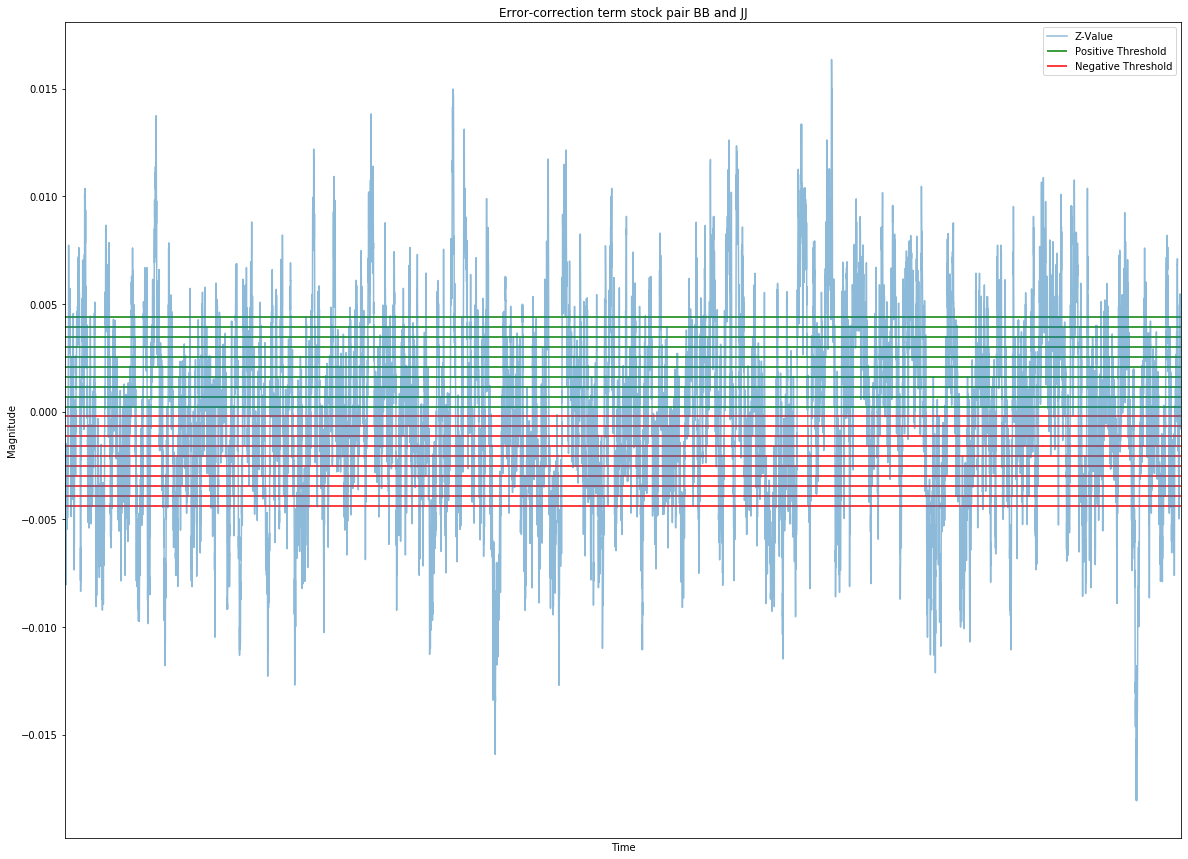

In [75]:
# Plot error-correction term (z-value) to observe what the spread looks like (see slide for comparison plot cointegrated pair)
def Plot_Thresholds(stock1, stock2):
    zvalue = tradable_pairs_data[stock1+stock2,'Z-Value']
    plt.figure(figsize=(20,15))
    plt.xticks([])
    plt.title('Error-correction term stock pair ' + stock1 + ' and ' + stock2)
    zvalue.plot(alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    xmin = 0
    xmax = len(zvalue)
    
    # Boundries chosen to give an approximate good fit
    plt.hlines(pnl_threshold['Thresholds'][10:20], xmin, xmax, 'g')  
    plt.hlines(-pnl_threshold['Thresholds'][10:20], xmin, xmax, 'r')
    
    plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'])
    plt.show()
        
Plot_Thresholds('BB','JJ')

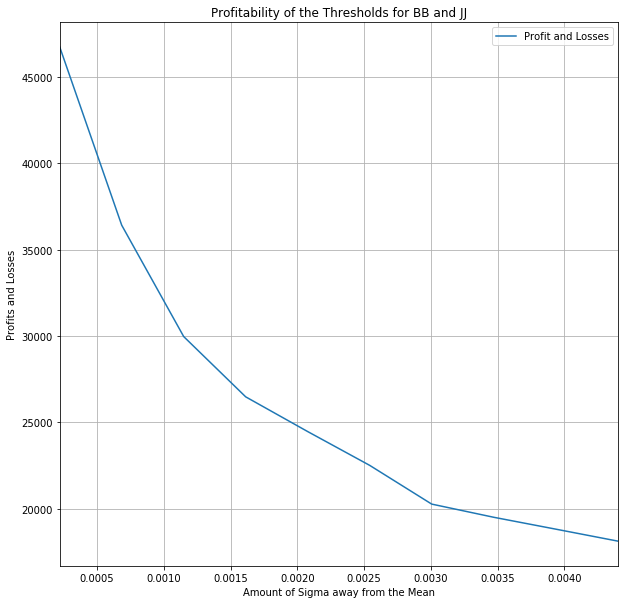

In [76]:
# Create a Plot that displays the Profitability of the Thresholds

def profitability_of_the_thresholds(stock1, stock2):
    pnl_threshold[(pnl_threshold.index == (stock1, stock2))].plot(x='Thresholds', y='PnLs', figsize=(10,10))
    plt.title('Profitability of the Thresholds for ' + stock1 + ' and ' + stock2)
    plt.xlabel('Amount of Sigma away from the Mean')
    plt.ylabel('Profits and Losses')
    plt.legend(['Profit and Losses'])
    plt.grid()

profitability_of_the_thresholds('BB','JJ')

In [77]:
# Determine the treshold, manually chosen based on pnl_threshold and ensuring no overlap.
threshold_dictionary = {('BB', 'JJ'): 0.000220,
                        ('FF', 'MM'): 0.000155,
                        ('DD', 'HH'): 0.000485,
                        ('AA', 'II'): 0.001070}

threshold_dictionary

{('BB', 'JJ'): 0.00022,
 ('FF', 'MM'): 0.000155,
 ('DD', 'HH'): 0.000485,
 ('AA', 'II'): 0.00107}

In [78]:
# Selection of the final pairs for this trading strategy
stock_pairs_final = [('BB', 'JJ'),
                     ('FF', 'MM'),
                     ('DD', 'HH'),
                     ('AA', 'II')]

stock_pairs_final

[('BB', 'JJ'), ('FF', 'MM'), ('DD', 'HH'), ('AA', 'II')]

In [79]:
positions_strategy_1 = {}
limit = 100

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    gamma = gamma_dictionary[stock1,stock2]
    
    threshold = threshold_dictionary[stock1,stock2]
        
    current_position_stock1 = 0 
    current_position_stock2 = 0 
        
    positions_strategy_1[stock1] = []

    for time, data_at_time in tradable_pairs_data.iterrows():

        BidPrice_Stock1 = data_at_time[stock1, 'BidPrice']
        AskPrice_Stock1 = data_at_time[stock1, 'AskPrice']
        BidPrice_Stock2 = data_at_time[stock2, 'BidPrice']
        AskPrice_Stock2 = data_at_time[stock2, 'AskPrice']

        BidVolume_Stock1 = data_at_time[stock1, 'BidVolume']
        AskVolume_Stock1 = data_at_time[stock1, 'AskVolume']
        BidVolume_Stock2 = data_at_time[stock2, 'BidVolume']
        AskVolume_Stock2 = data_at_time[stock2, 'AskVolume']

        zvalue = data_at_time[stock1+stock2,'Z-Value']

        if zvalue >= threshold:
            hedge_ratio = gamma * (BidPrice_Stock1 / AskPrice_Stock2)
                
            if hedge_ratio >= 1:

                max_order_stock1 = current_position_stock1 + limit
                max_order_stock2 = max_order_stock1 / hedge_ratio

                trade = np.floor(min((BidVolume_Stock1 / hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((- trade * hedge_ratio) + current_position_stock1)

                current_position_stock1 = ((- trade * hedge_ratio) + current_position_stock1)
                
            elif hedge_ratio < 1:

                max_order_stock1 = current_position_stock1 + limit
                max_order_stock2 = max_order_stock1 * hedge_ratio

                trade = np.floor(min((BidVolume_Stock1 * hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((- trade / hedge_ratio) + current_position_stock1)

                current_position_stock1 = ((- trade / hedge_ratio) + current_position_stock1)

        elif zvalue <= -threshold:
            hedge_ratio = gamma * (AskPrice_Stock1 / BidPrice_Stock2)
                
            if hedge_ratio >= 1:

                max_order_stock1 = abs(current_position_stock1 - limit)
                max_order_stock2 = max_order_stock1 / hedge_ratio

                trade = np.floor(min((AskVolume_Stock1 / hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((+ trade * hedge_ratio) + current_position_stock1)

                current_position_stock1 = (+ trade * hedge_ratio) + current_position_stock1

            elif hedge_ratio < 1:
                    
                max_order_stock1 = abs(current_position_stock1 - limit)
                max_order_stock2 = max_order_stock1 * hedge_ratio

                trade = np.floor(min((AskVolume_Stock1 * hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((+ trade / hedge_ratio) + current_position_stock1)

                current_position_stock1 = (+ trade / hedge_ratio) + current_position_stock1   

        else:

                positions_strategy_1[stock1].append(current_position_stock1)
        
    if hedge_ratio >= 1:
        positions_strategy_1[stock2] = positions_strategy_1[stock1] / hedge_ratio * -1
        
    elif hedge_ratio < 1:
        positions_strategy_1[stock2] = positions_strategy_1[stock1] / (1 / hedge_ratio) * -1

In [80]:
# Set Ceiling (to prevent positions with not enough volume available) as well as define the timestamp
positions_strategy_1 = np.ceil(pd.DataFrame(positions_strategy_1)) # np.ceil This function returns the ceil value of the input array elements
positions_strategy_1['Timestamp'] = tradable_pairs_data.index
positions_strategy_1 = positions_strategy_1.set_index('Timestamp')

In [81]:
# The difference between the positions
positions_diff_strategy_1 = positions_strategy_1.diff()[1:]

# # Positions_diff first rows
# positions_diff_strategy_1.head()

In [82]:
#Used as mentioned earlier.
positions_diff_strategy_1[-1:] = -positions_strategy_1[-1:]

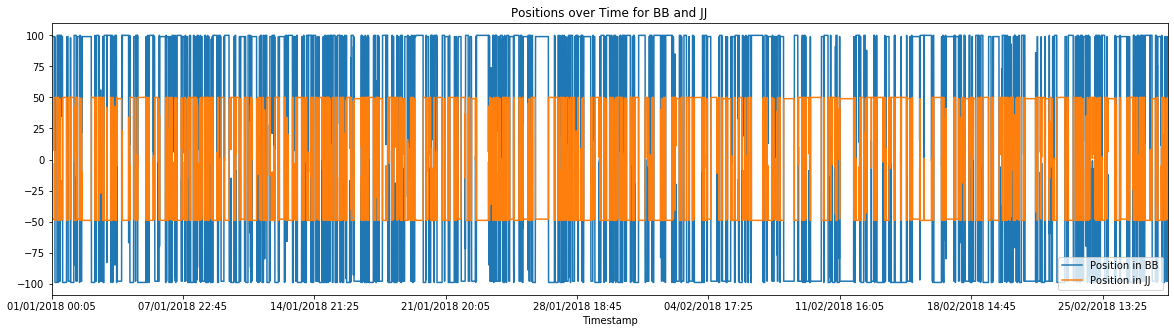

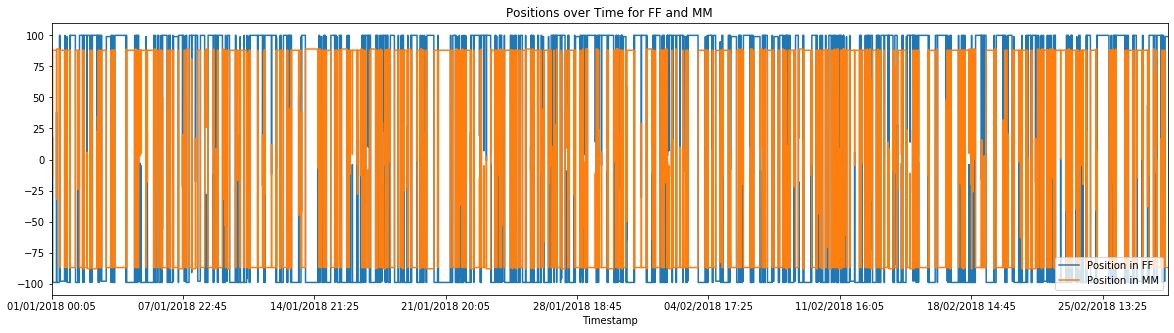

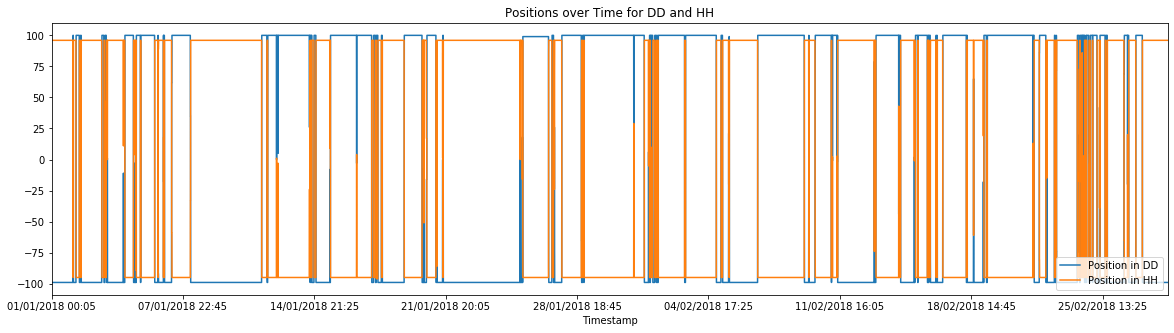

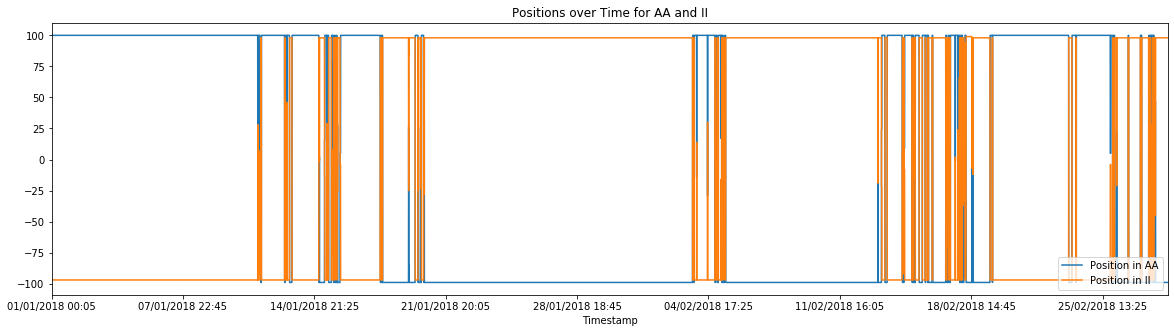

In [83]:
# Show Positions over Time
for pairs in stock_pairs_final:
    stock1 = pairs[0]
    stock2 = pairs[1]
    
    plt.figure(figsize=(20,5))
    
    positions_strategy_1[stock1].plot()
    positions_strategy_1[stock2].plot()
    
    plt.title('Positions over Time for ' + stock1 + ' and ' + stock2)
    plt.legend(["Position in " + stock1,"Position in " + stock2], loc='lower right')
    
    plt.show()

In [84]:
pnl_dataframe_strategy_1 = pd.DataFrame()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    Stock1_AskPrice = tradable_pairs_data[stock1,'AskPrice'][1:]
    Stock1_BidPrice = tradable_pairs_data[stock1,'BidPrice'][1:]
    Stock2_AskPrice = tradable_pairs_data[stock2,'AskPrice'][1:]
    Stock2_BidPrice = tradable_pairs_data[stock2,'BidPrice'][1:]

    pnl_dataframe_strategy_1[stock1] = np.where(positions_diff_strategy_1[stock1] > 0, positions_diff_strategy_1[stock1] * -Stock1_BidPrice, positions_diff_strategy_1[stock1] * -Stock1_AskPrice)
    pnl_dataframe_strategy_1[stock2] = np.where(positions_diff_strategy_1[stock2] > 0, positions_diff_strategy_1[stock2] * -Stock2_BidPrice, positions_diff_strategy_1[stock2] * -Stock2_AskPrice)

print("The total profit is: €",round(pnl_dataframe_strategy_1.sum().sum()))

The total profit is: € 135848.0


In [85]:
pnl_dataframe_strategy_1['Timestamp'] = tradable_pairs_data.index[1:]
pnl_dataframe_strategy_1 = pnl_dataframe_strategy_1.set_index('Timestamp')

pnl_dataframe_strategy_1['PnL'] = pnl_dataframe_strategy_1.sum(axis=1)
pnl_dataframe_strategy_1['Cum PnL'] = pnl_dataframe_strategy_1['PnL'].cumsum()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]

    pnl_dataframe_strategy_1[stock1+stock2 + ' PnL'] = pnl_dataframe_strategy_1[stock1] + pnl_dataframe_strategy_1[stock2]
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'] = pnl_dataframe_strategy_1[stock1+stock2 + ' PnL'].cumsum()

pnl_dataframe_strategy_1.tail()

,BB,JJ,FF,MM,DD,HH,AA,II,PnL,Cum PnL,BBJJ PnL,BBJJ Cum PnL,FFMM PnL,FFMM Cum PnL,DDHH PnL,DDHH Cum PnL,AAII PnL,AAII Cum PnL
Timestamp,,,,,,,,,,,,,,,,,,
28/02/2018 23:35,-7181.25,2861.95,-0.0,-0.00,-0.0,-0.0,-0.0,-0.0,-4319.30,124462.35,-4319.30,40830.20,-0.00,56565.05,-0.0,16309.3,-0.0,10757.8
28/02/2018 23:40,14880.00,-5932.85,-0.0,-0.00,-0.0,-0.0,-0.0,-0.0,8947.15,133409.50,8947.15,49777.35,-0.00,56565.05,-0.0,16309.3,-0.0,10757.8
28/02/2018 23:45,4032.00,-1615.95,-0.0,-0.00,-0.0,-0.0,-0.0,-0.0,2416.05,135825.55,2416.05,52193.40,-0.00,56565.05,-0.0,16309.3,-0.0,10757.8
28/02/2018 23:50,-0.00,-0.00,-0.0,-0.00,-0.0,-0.0,-0.0,-0.0,0.00,135825.55,-0.00,52193.40,-0.00,56565.05,-0.0,16309.3,-0.0,10757.8
28/02/2018 23:55,-9383.50,3862.50,10474.2,-7851.75,-11127.6,14371.2,-9187.2,8864.1,21.95,135847.50,-5521.00,46672.40,2622.45,59187.50,3243.6,19552.9,-323.1,10434.7


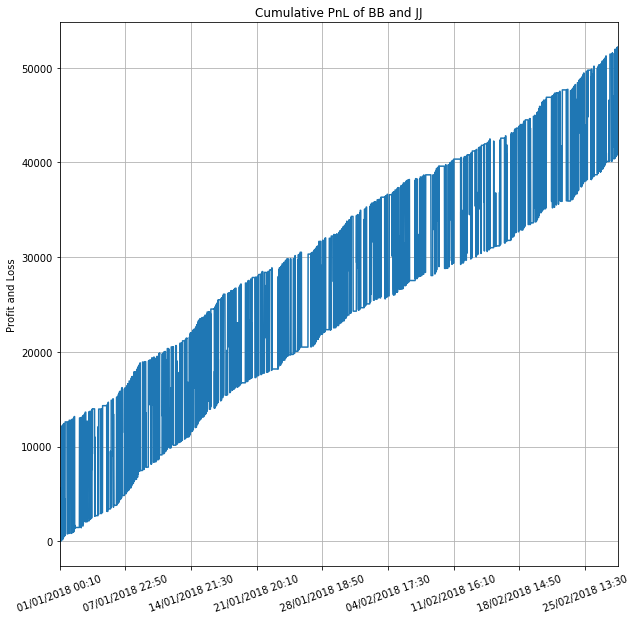

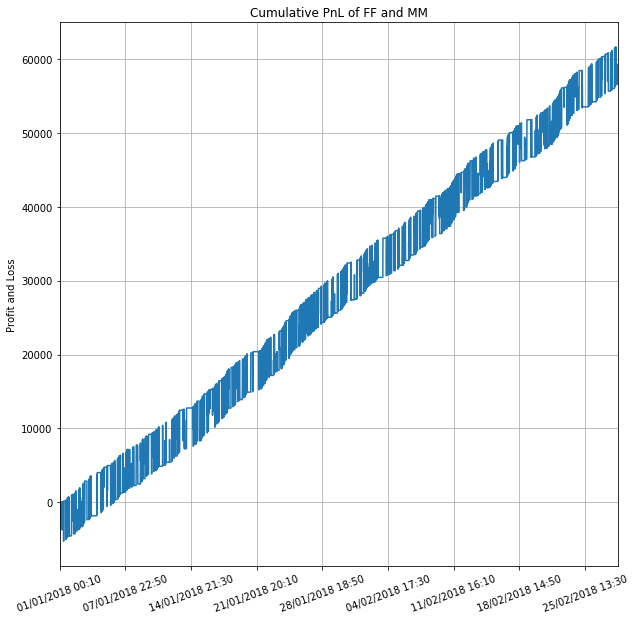

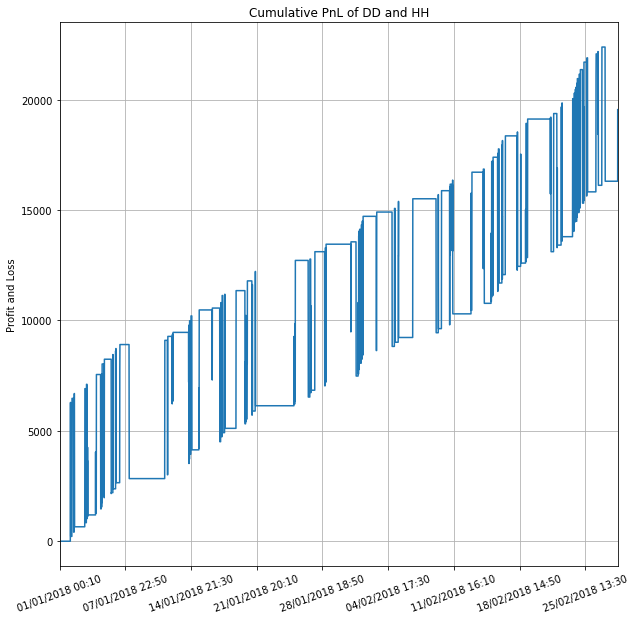

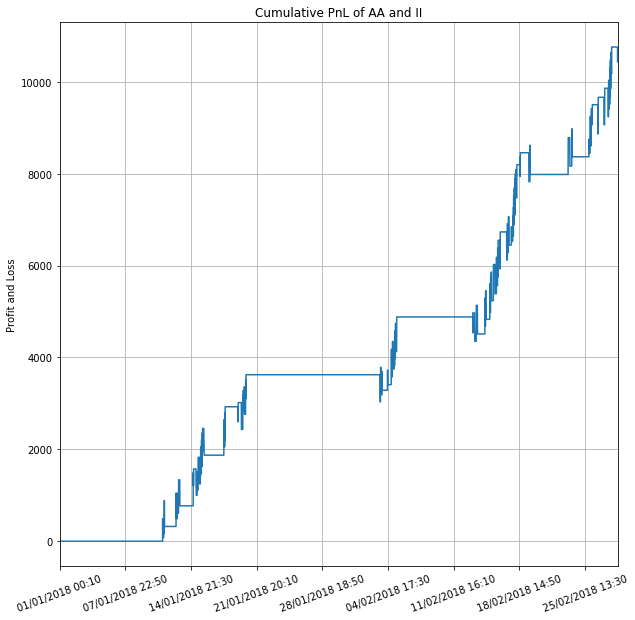

In [86]:
# All Pairs's PnL

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'].plot(figsize=(10,10))
    plt.title('Cumulative PnL of ' + stock1 + ' and ' + stock2)
    plt.ylabel('Profit and Loss')
    plt.xlabel("")
    plt.grid()
    plt.xticks(rotation=20)
    plt.show()


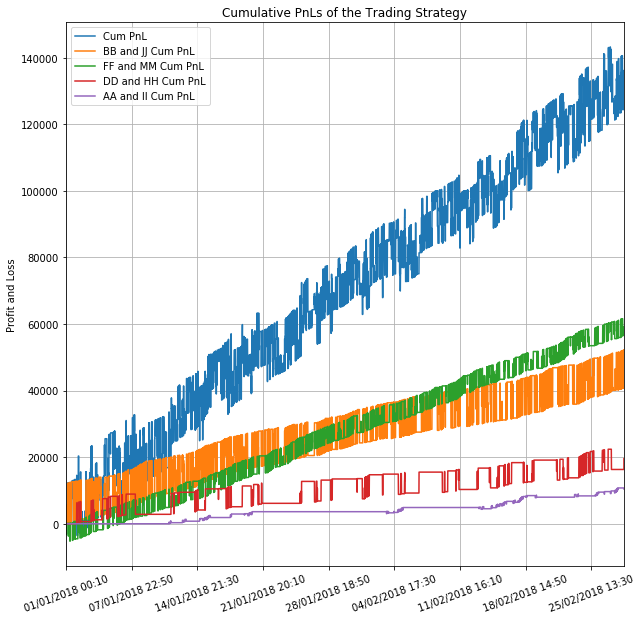

In [87]:
# All Pairs's PnLs (including total) in one graph

pnl_dataframe_strategy_1['Cum PnL'].plot()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'].plot(figsize=(10,10))
    plt.legend(['Cum PnL', 'BB and JJ Cum PnL', 'FF and MM Cum PnL', 'DD and HH Cum PnL','AA and II Cum PnL'])
    plt.title('Cumulative PnLs of the Trading Strategy')
    plt.ylabel('Profit and Loss')
    plt.xlabel("")
    plt.grid()
    plt.xticks(rotation=20)

In [88]:
# Send to CSV
pnl_dataframe_strategy_1.to_csv('Algorithm PnL Results.csv')

In [ ]:
# Send to Excel (in case CSV is incorrect)
pnl_dataframe_strategy_1.to_excel('Algorithm PnL Results.xlsx')